In [72]:
"""
Train optimization algos on a neural net
"""

'\nTrain optimization algos on a neural net\n'

In [73]:
import sys
import pdb
import time
import random
sys.path.append("C:\\users\\mccar\\miniconda3\\lib\\site-packages")
sys.path.append("c:\\users\\mccar\\appdata\\local\\programs\\python\\python311\\lib\\site-packages")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose as mlr
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [74]:
# Load data

# pd.set_option('display.max_columns', 60)
train_df = pd.read_csv("data/gtzan_music_genre/features_30_sec.csv")
train_df.head()
print(train_df.shape)
print(train_df.info())

(1000, 60)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean  

In [75]:
# Preprocessing
train_df = train_df.drop(['filename', 'length'], axis = 1)
y = train_df['label']
X = train_df.drop('label', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# More preprocessing
label_encoder = LabelEncoder()
scale = MinMaxScaler()
scaled_data = scale.fit_transform(x_train)
x_train_sc = pd.DataFrame(scaled_data, columns = x_train.columns).values
scaled_data = scale.fit_transform(x_test)
x_test_sc = pd.DataFrame(scaled_data, columns = x_test.columns).values
y_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# One-hot encode target labels
num_classes = len(np.unique(y_train))  # Assuming there are 10 classes
 # One hot encode target values
y_train_one_hot = pd.get_dummies(y_train).values
y_test_one_hot = pd.get_dummies(y_test).values

In [77]:
# get data
DATA_PATH = "data/mnist/mnist_train.csv"
train_df = pd.read_csv(DATA_PATH)
DATA_PATH = "data/mnist/mnist_test.csv"
test_df = pd.read_csv(DATA_PATH)

y_train = train_df["label"]
x_train_sc = train_df.drop(["label"], axis=1)
y_test = test_df["label"]
x_test_sc = test_df.drop(["label"], axis=1)

# One hot encode target values
y_train_one_hot = pd.get_dummies(y_train).values
y_test_one_hot = pd.get_dummies(y_test).values

In [78]:
# for mnist

def train_neural_network(x_train, y_train, x_test, y_test, hidden_nodes, max_iters_list, learning_rate, random_state, verbose=1):
    optimization_algorithms = ['genetic_alg', 'random_hill_climb', 'simulated_annealing', 'gradient_descent']
    # optimization_algorithms = ['genetic_alg']
    # optimization_algorithms = ['random_hill_climb']
    train_accuracies = []
    test_accuracies = []
    train_times = []
    
    scores = {}

    for algorithm in optimization_algorithms:
        algo_scores = {}
        train_accuracies = []
        test_accuracies = []
        train_times = []

        for max_iters in max_iters_list:
            train_time_algo = []
            start_time = time.time()
            rand_seed = random.randint(1, 42)

            if algorithm == 'genetic_alg' and (max_iters % 20 != 0 and (max_iters-1) % 20 != 0) and max_iters != 100:
                continue
            
            # Initialize neural network object
            if algorithm == 'gradient_descent':
                learn_r = 0.0001
            elif algorithm == 'genetic_alg':
                learn_r = 0.01
            else:
                learn_r = learning_rate

            if algorithm == 'genetic_alg':
                # max_i = int(max_iters / 3)
                max_i = max_iters
            else:
                max_i = max_iters


            nn_model = mlr.NeuralNetwork(hidden_nodes=hidden_nodes,
                                             activation='relu',
                                             algorithm=algorithm,
                                             max_iters=max_i,
                                             clip_max=1,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=learn_r,
                                             early_stopping=True,
                                             max_attempts=2000,
                                             pop_size=25,
                                             mutation_prob=0.05,
                                             random_state=rand_seed,
                                             curve=False)  # Disable curve for faster training
            
            # Fit the model
            nn_model.fit(x_train, y_train)

            # Predict labels for train and test set
            y_train_pred = nn_model.predict(x_train)
            y_test_pred = nn_model.predict(x_test)
            
            # Calculate accuracy
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            
            # Calculate Time
            end_time = time.time()
            train_time = end_time - start_time
            if verbose==2:
                print(f'Algorithm: {algorithm}  Max Iters: {max_iters}')
                print(f'Train Accuracy: {train_accuracy}')
                print(f'Test Accuracy: {test_accuracy}')
                print(f'Runtime: {train_time} seconds\n')
            elif verbose==1:
                print(f'Algorithm: {algorithm}  Max Iters: {max_iters}  Runtime: {round(train_time,3)} seconds   Train Acc: {round(train_accuracy, 3)}')
            train_accuracies.append(train_accuracy)
            test_accuracies.append(test_accuracy)
            train_times.append(train_time)
        algo_scores['train_accuracies'] = train_accuracies
        algo_scores['test_accuracies'] = test_accuracies
        algo_scores['train_times'] = train_times
        scores[algorithm] = algo_scores
    return scores

hidden_nodes = [64]
# hidden_nodes = [64]
# max_iters_list = list(range(100, 10100, 200))
max_iters_list = list(range(1, 200, 100))
# max_iters_list = [50]
learning_rate = 0.5
random_state = 42
scores = train_neural_network(x_train_sc, y_train_one_hot, x_test_sc, 
                                                         y_test_one_hot, hidden_nodes, max_iters_list, 
                                                         learning_rate, random_state)

colors = ['blue', 'green', 'orange', 'red']
max_iters_filtered = [max_iter for max_iter in max_iters_list if max_iter % 500 == 0 or (max_iter-100) % 500 == 0 or max_iter == 100]
for i, algorithm in enumerate(scores):
    color = colors[i]  # Select color for the algorithm
    if algorithm == 'genetic_alg':
        plt.plot(max_iters_filtered, scores[algorithm]['train_accuracies'], label=f'Train ({algorithm})', marker='o', color=color)
        plt.plot(max_iters_filtered, scores[algorithm]['test_accuracies'], label=f'Test ({algorithm})', marker='o', linestyle='dashed', color=color)
    else:
        plt.plot(max_iters_list, scores[algorithm]['train_accuracies'], label=f'Train ({algorithm})', marker='o', color=color)
        plt.plot(max_iters_list, scores[algorithm]['test_accuracies'], label=f'Test ({algorithm})', marker='o', linestyle='dashed', color=color)

plt.title('Neural Network Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.xticks(range(0, max(max_iters_list) + 1, 1000))
plt.legend(loc="upper left")
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

for i, algorithm in enumerate(scores):
    color = colors[i]  # Select color for the algorithm
    if algorithm == 'genetic_alg':
        plt.plot(max_iters_filtered, scores[algorithm]['train_times'], label=algorithm, marker='o', color=color)
    else:
        plt.plot(max_iters_list, scores[algorithm]['train_times'], label=algorithm, marker='o', color=color)

plt.title('Iterations vs. Run Time')
plt.xlabel('Iterations')
plt.ylabel('Run Time')
plt.xticks(range(0, max(max_iters_list) + 1, 1000))
plt.legend(loc="upper left")
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

for algorithm in scores:
    print(f'Algorithm: {algorithm}')
    print(f'Final Train Accuracy: {scores[algorithm]["train_accuracies"][-1]}')
    print(f'Final Test Accuracy: {scores[algorithm]["test_accuracies"][-1]}')
    print(f'Final Train Time: {scores[algorithm]["train_times"][-1]} seconds')


Algorithm: random_hill_climb  Max Iters: 1  Runtime: 1.423 seconds   Train Acc: 0.094
Algorithm: random_hill_climb  Max Iters: 6  Runtime: 3.902 seconds   Train Acc: 0.098
Algorithm: random_hill_climb  Max Iters: 11  Runtime: 6.584 seconds   Train Acc: 0.151
Algorithm: random_hill_climb  Max Iters: 16  Runtime: 9.495 seconds   Train Acc: 0.053
Algorithm: random_hill_climb  Max Iters: 21  Runtime: 11.038 seconds   Train Acc: 0.092
Algorithm: random_hill_climb  Max Iters: 26  Runtime: 14.576 seconds   Train Acc: 0.092
Algorithm: random_hill_climb  Max Iters: 31  Runtime: 15.543 seconds   Train Acc: 0.064
Algorithm: random_hill_climb  Max Iters: 36  Runtime: 21.171 seconds   Train Acc: 0.113
Algorithm: random_hill_climb  Max Iters: 41  Runtime: 20.653 seconds   Train Acc: 0.084
Algorithm: random_hill_climb  Max Iters: 46  Runtime: 24.057 seconds   Train Acc: 0.093
Algorithm: random_hill_climb  Max Iters: 51  Runtime: 26.32 seconds   Train Acc: 0.042
Algorithm: random_hill_climb  Max Iters

KeyboardInterrupt: 

Algorithm: genetic_alg  Max Iters: 100  Runtime: 6.729 seconds   Train Acc: 0.11
Algorithm: genetic_alg  Max Iters: 500  Runtime: 63.95 seconds   Train Acc: 0.091
Algorithm: genetic_alg  Max Iters: 1100  Runtime: 165.822 seconds   Train Acc: 0.088
Algorithm: genetic_alg  Max Iters: 1500  Runtime: 223.677 seconds   Train Acc: 0.144
Algorithm: genetic_alg  Max Iters: 2100  Runtime: 260.068 seconds   Train Acc: 0.071
Algorithm: genetic_alg  Max Iters: 2500  Runtime: 130.07 seconds   Train Acc: 0.079
Algorithm: genetic_alg  Max Iters: 3100  Runtime: 294.19 seconds   Train Acc: 0.111
Algorithm: genetic_alg  Max Iters: 3500  Runtime: 298.684 seconds   Train Acc: 0.062
Algorithm: genetic_alg  Max Iters: 4100  Runtime: 175.384 seconds   Train Acc: 0.08
Algorithm: genetic_alg  Max Iters: 4500  Runtime: 153.912 seconds   Train Acc: 0.095
Algorithm: genetic_alg  Max Iters: 5100  Runtime: 204.338 seconds   Train Acc: 0.13
Algorithm: genetic_alg  Max Iters: 5500  Runtime: 365.277 seconds   Train Ac

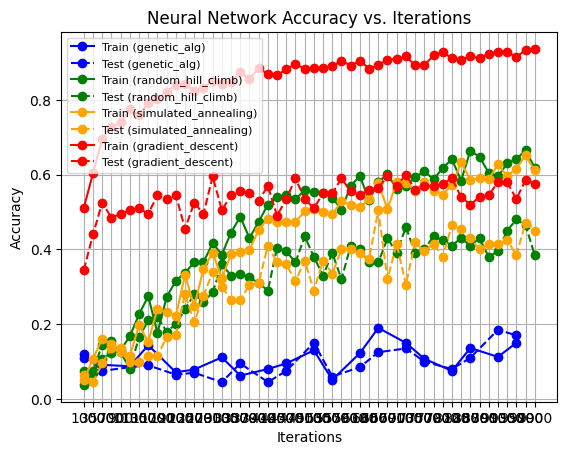

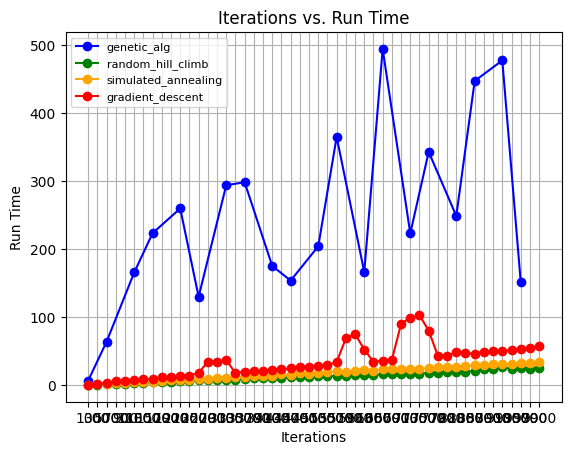

Algorithm: genetic_alg
Final Train Accuracy: 0.15
Final Test Accuracy: 0.17
Final Train Time: 152.23823142051697 seconds
Algorithm: random_hill_climb
Final Train Accuracy: 0.61875
Final Test Accuracy: 0.385
Final Train Time: 25.080981731414795 seconds
Algorithm: simulated_annealing
Final Train Accuracy: 0.61125
Final Test Accuracy: 0.45
Final Train Time: 33.425814628601074 seconds
Algorithm: gradient_descent
Final Train Accuracy: 0.93625
Final Test Accuracy: 0.575
Final Train Time: 56.99848246574402 seconds


In [68]:
# for gtzan

def train_neural_network(x_train, y_train, x_test, y_test, hidden_nodes, max_iters_list, learning_rate, random_state, verbose=1):
    optimization_algorithms = ['genetic_alg', 'random_hill_climb', 'simulated_annealing', 'gradient_descent']
    # optimization_algorithms = ['genetic_alg']
    # optimization_algorithms = ['random_hill_climb']
    train_accuracies = []
    test_accuracies = []
    train_times = []
    
    scores = {}

    for algorithm in optimization_algorithms:
        algo_scores = {}
        train_accuracies = []
        test_accuracies = []
        train_times = []

        for max_iters in max_iters_list:
            train_time_algo = []
            start_time = time.time()
            rand_seed = random.randint(1, 42)

            if algorithm == 'genetic_alg' and (max_iters % 500 != 0 and (max_iters-100) % 500 != 0) and max_iters != 100:
                continue
            
            # Initialize neural network object
            if algorithm == 'gradient_descent':
                learn_r = 0.0001
            elif algorithm == 'genetic_alg':
                learn_r = 0.01
            else:
                learn_r = learning_rate

            if algorithm == 'genetic_alg':
                # max_i = int(max_iters / 3)
                max_i = max_iters
            else:
                max_i = max_iters


            nn_model = mlr.NeuralNetwork(hidden_nodes=hidden_nodes,
                                             activation='relu',
                                             algorithm=algorithm,
                                             max_iters=max_i,
                                             clip_max=1,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=learn_r,
                                             early_stopping=True,
                                             max_attempts=2000,
                                             pop_size=25,
                                             mutation_prob=0.05,
                                             random_state=rand_seed,
                                             curve=False)  # Disable curve for faster training
            
            # Fit the model
            nn_model.fit(x_train, y_train)

            # Predict labels for train and test set
            y_train_pred = nn_model.predict(x_train)
            y_test_pred = nn_model.predict(x_test)
            
            # Calculate accuracy
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            
            # Calculate Time
            end_time = time.time()
            train_time = end_time - start_time
            if verbose==2:
                print(f'Algorithm: {algorithm}  Max Iters: {max_iters}')
                print(f'Train Accuracy: {train_accuracy}')
                print(f'Test Accuracy: {test_accuracy}')
                print(f'Runtime: {train_time} seconds\n')
            elif verbose==1:
                print(f'Algorithm: {algorithm}  Max Iters: {max_iters}  Runtime: {round(train_time,3)} seconds   Train Acc: {round(train_accuracy, 3)}')
            train_accuracies.append(train_accuracy)
            test_accuracies.append(test_accuracy)
            train_times.append(train_time)
        algo_scores['train_accuracies'] = train_accuracies
        algo_scores['test_accuracies'] = test_accuracies
        algo_scores['train_times'] = train_times
        scores[algorithm] = algo_scores
    return scores

hidden_nodes = [64]
# hidden_nodes = [64]
max_iters_list = list(range(100, 10100, 200))
# max_iters_list = list(range(1, 200, 45))
# max_iters_list = list(range(100, 600, 100))
# max_iters_list = [50]
learning_rate = 0.5
random_state = 42
scores = train_neural_network(x_train_sc, y_train_one_hot, x_test_sc, 
                                                         y_test_one_hot, hidden_nodes, max_iters_list, 
                                                         learning_rate, random_state)

colors = ['blue', 'green', 'orange', 'red']
max_iters_filtered = [max_iter for max_iter in max_iters_list if max_iter % 500 == 0 or (max_iter-100) % 500 == 0 or max_iter == 100]
for i, algorithm in enumerate(scores):
    color = colors[i]  # Select color for the algorithm
    if algorithm == 'genetic_alg':
        plt.plot(max_iters_filtered, scores[algorithm]['train_accuracies'], label=f'Train ({algorithm})', marker='o', color=color)
        plt.plot(max_iters_filtered, scores[algorithm]['test_accuracies'], label=f'Test ({algorithm})', marker='o', linestyle='dashed', color=color)
    else:
        plt.plot(max_iters_list, scores[algorithm]['train_accuracies'], label=f'Train ({algorithm})', marker='o', color=color)
        plt.plot(max_iters_list, scores[algorithm]['test_accuracies'], label=f'Test ({algorithm})', marker='o', linestyle='dashed', color=color)

plt.title('Neural Network Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.xticks(range(0, max(max_iters_list) + 1, 1000))
plt.legend(loc="upper left")
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

for i, algorithm in enumerate(scores):
    color = colors[i]  # Select color for the algorithm
    if algorithm == 'genetic_alg':
        plt.plot(max_iters_filtered, scores[algorithm]['train_times'], label=algorithm, marker='o', color=color)
    else:
        plt.plot(max_iters_list, scores[algorithm]['train_times'], label=algorithm, marker='o', color=color)

plt.title('Iterations vs. Run Time')
plt.xlabel('Iterations')
plt.ylabel('Run Time')
plt.xticks(range(0, max(max_iters_list) + 1, 1000))
plt.legend(loc="upper left")
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

for algorithm in scores:
    print(f'Algorithm: {algorithm}')
    print(f'Final Train Accuracy: {scores[algorithm]["train_accuracies"][-1]}')
    print(f'Final Test Accuracy: {scores[algorithm]["test_accuracies"][-1]}')
    print(f'Final Train Time: {scores[algorithm]["train_times"][-1]} seconds')


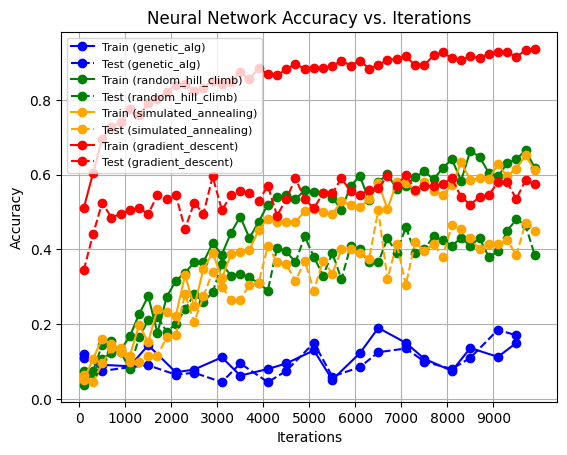

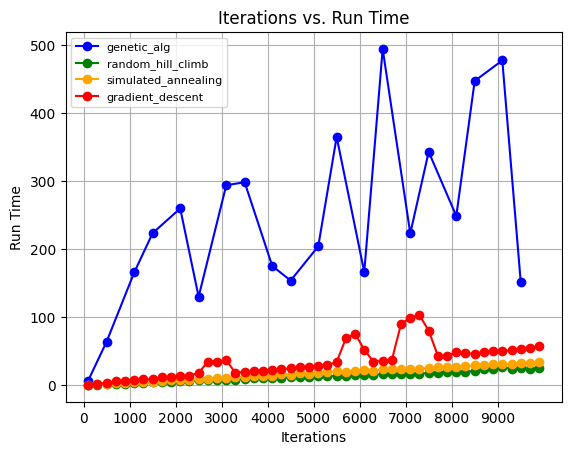

In [71]:
colors = ['blue', 'green', 'orange', 'red']
max_iters_filtered = [max_iter for max_iter in max_iters_list if max_iter % 500 == 0 or (max_iter-100) % 500 == 0 or max_iter == 100]
for i, algorithm in enumerate(scores):
    color = colors[i]  # Select color for the algorithm
    if algorithm == 'genetic_alg':
        plt.plot(max_iters_filtered, scores[algorithm]['train_accuracies'], label=f'Train ({algorithm})', marker='o', color=color)
        plt.plot(max_iters_filtered, scores[algorithm]['test_accuracies'], label=f'Test ({algorithm})', marker='o', linestyle='dashed', color=color)
    else:
        plt.plot(max_iters_list, scores[algorithm]['train_accuracies'], label=f'Train ({algorithm})', marker='o', color=color)
        plt.plot(max_iters_list, scores[algorithm]['test_accuracies'], label=f'Test ({algorithm})', marker='o', linestyle='dashed', color=color)

plt.title('Neural Network Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.xticks(range(0, max(max_iters_list) + 1, 1000))
plt.legend(loc="upper left")
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

for i, algorithm in enumerate(scores):
    color = colors[i]  # Select color for the algorithm
    if algorithm == 'genetic_alg':
        plt.plot(max_iters_filtered, scores[algorithm]['train_times'], label=algorithm, marker='o', color=color)
    else:
        plt.plot(max_iters_list, scores[algorithm]['train_times'], label=algorithm, marker='o', color=color)

plt.title('Iterations vs. Run Time')
plt.xlabel('Iterations')
plt.ylabel('Run Time')
plt.xticks(range(0, max(max_iters_list) + 1, 1000))
plt.legend(loc="upper left")
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

In [ ]:
# NN optimization SA
nn_model = mlr.NeuralNetwork(hidden_nodes=[32, 16, 8],
                                     activation='relu',
                                     algorithm='random_hill_climb',
                                     max_iters=50000,
                                     bias=True,
                                     is_classifier=True,
                                     learning_rate=0.5,
                                     early_stopping=False,
                                     max_attempts=100,
                                     random_state=42)

# Fit the model
nn_model.fit(x_train_sc, y_train_one_hot)

# Predict labels for train and test set
y_train_pred = nn_model.predict(x_train_sc)
y_test_pred = nn_model.predict(x_test_sc)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_one_hot, y_train_pred)
test_accuracy = accuracy_score(y_test_one_hot, y_test_pred)
print(train_accuracy)
print(test_accuracy)


0.69625
0.385


Below was used for testing / tuning

In [51]:
# Simulated Annealing
nn_model1 = mlr.NeuralNetwork(hidden_nodes = [32, 16, 8], activation = 'relu', 
                                 algorithm = 'simulated_annealing', 
                                 max_iters = 50000, bias = True, is_classifier = True, 
                                 learning_rate = 0.5, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 42,
                                 schedule=mlr.ExpDecay())

# Fit the model
nn_model.fit(x_train_sc, y_train_one_hot)

# Predict labels for train and test set
y_train_pred = nn_model.predict(x_train_sc)
y_test_pred = nn_model.predict(x_test_sc)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_one_hot, y_train_pred)
test_accuracy = accuracy_score(y_test_one_hot, y_test_pred)
print(train_accuracy)
print(test_accuracy)


0.08625
0.085


In [18]:
nn_model = mlr.NeuralNetwork(hidden_nodes=[8, 16], activation = 'relu', 
                                 algorithm = 'genetic_alg', 
                                 max_iters = 10000, bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 1, max_attempts = 2000, random_state=42,
                                 pop_size=40, mutation_prob=0.05)

# best
# nn_model = mlr.NeuralNetwork(hidden_nodes=[64], activation = 'relu', 
#                                  algorithm = 'genetic_alg', 
#                                  max_iters = 200, bias = True, is_classifier = True, 
#                                  learning_rate = 0.01, early_stopping = True, 
#                                  clip_max = 1, max_attempts = 200, random_state=42,
#                                  pop_size=200, mutation_prob=0.1)


# Fit the model
nn_model.fit(x_train_sc, y_train_one_hot)

# Predict labels for train and test set
y_train_pred = nn_model.predict(x_train_sc)
y_test_pred = nn_model.predict(x_test_sc)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_one_hot, y_train_pred)
test_accuracy = accuracy_score(y_test_one_hot, y_test_pred)
print(train_accuracy)
print(test_accuracy)
print(y_train_pred)

0.04125
0.08
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [10]:
print(y_train_pred[:50])
print(x_train_sc[:10])

[[0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0

In [51]:
# NN optimization SA
nn_model = mlr.NeuralNetwork(hidden_nodes=[32, 16, 8],
                                     activation='relu',
                                     algorithm='gradient_descent',
                                     max_iters=100,
                                     bias=True,
                                     is_classifier=True,
                                     learning_rate=0.5,
                                     early_stopping=False,
                                     max_attempts=1000,
                                     random_state=42)

# Fit the model
nn_model.fit(x_train_sc, y_train_one_hot)

# Predict labels for train and test set
y_train_pred = nn_model.predict(x_train_sc)
y_test_pred = nn_model.predict(x_test_sc)

print(y_test_pred)
# Calculate accuracy
train_accuracy = accuracy_score(y_train_one_hot, y_train_pred)
test_accuracy = accuracy_score(y_test_one_hot, y_test_pred)
print(train_accuracy)
print(test_accuracy)


[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
0.1
0.1


In [ ]:
# Assuming x_train_sc has shape (number_of_samples, number_of_features)
# Make sure to replace 'number_of_features' with the actual number of features in your data.

# Define the model
model = Sequential()
# Add hidden layer
model.add(Dense(units=128, input_dim=x_train_sc.shape[1], activation='tanh'))
# Add hidden layer
model.add(Dense(units=64, activation='relu'))
# Add hidden layer
model.add(Dense(units=32, activation='relu'))
# Add hidden layer
model.add(Dense(units=16, activation='relu'))
# Add hidden layer
model.add(Dense(units=8, activation='relu'))
# Output layer
model.add(Dense(units=len(y_train.unique()), activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Print the model summary
# model.summary()
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
# model.summary()


# Custom callback for logging test accuracy at each epoch
class TestAccuracyLogger(Callback):
    def __init__(self, test_data):
        super().__init__()
        self.test_data = test_data
        self.test_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        _, test_accuracy = self.model.evaluate(self.test_data[0], self.test_data[1], verbose=0)
        self.test_accuracies.append(test_accuracy)
        print(f'Test Accuracy after Epoch {epoch + 1}: {test_accuracy * 100:.2f}%')

# Assuming x_test_sc and y_test are your test data and labels
# Also, replace 'num_classes' with the actual number of classes in your classification task.

# Create an instance of the custom callback
test_accuracy_logger = TestAccuracyLogger(test_data=(x_test_sc, y_test_encoded))

# Fit the model with the custom callback
history = model.fit(x_train_sc, y_encoded, epochs=250, batch_size=32, validation_split=0.1, callbacks=[test_accuracy_logger])

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(test_accuracy_logger.test_accuracies, label='Test Accuracy', linestyle='dashed')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# # Fit the model
# # print(x_train_sc)
# model.fit(x_train_sc, y_encoded, epochs=100, batch_size=32, validation_split=0.1)

# # # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(x_test_sc, y_test_encoded)
# print("Test Accuracy: %.2f%%" % (test_accuracy * 100))